# Classification Analysis

## Part I: Research Question

> Can we predict whether or not a customer will churn based only on age, bandwidth usage, monthly charge, and tenure?

> We will answer this question using k-nearest neighbor (KNN)

> The goal of this data analysis is to find if we can predict customer churn based on the age, bandwidth usage, monthly charge, and tenure.

## Part II: Method Justification

> KNN analyzes the data by inputting training and testing data. The target variable for this analysis is Churn, and the predictor variables are going to be age, bandwidth usage, monthly charge, tenure. Using this data, we will be able to find what groups are most likely and least likely to churn. The expected outcome is to find the prediction score and accuracy score of using the KNN algorithm on this data. We will then be able to see if its possible to predict churn based on these variables.

> The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. We can use this information to find that the closest things in proximity are the most related.

In [1]:
# Importing packages to be used
import numpy as np
# numpy for data analysis functionality
import pandas as pd
# pandas for dataframes
from sklearn.neighbors import KNeighborsClassifier
# KNN classifier
import matplotlib.pyplot as plt
%matplotlib inline
# matplotlib for plotting
import seaborn as sns
# seaborn for extra plotting functionality

## Part III: Data Preparation

> 1. One data preprocessing goal for this analysis will be to scale and normalize the data. This will give us more accurate results in our analysis.

> 2. The initial variables we will use are Churn, which is categorical, and Age, mothly charge, bandwidth, and tenure, which are all continuous

> 3. Preparing the data for analysis:

Data preparation will consist of cleaning up bad data, such as replacing nulls, removing duplicated rows, etc. We will also convert categorical variables to numerical so we can run linear regression.

In [2]:
# Importing the data
df = pd.read_csv('Churn Data\churn_clean.csv')

In [3]:
# Checking for null values
df.isna().any()

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

> These are all false, meaning there are no null values

In [4]:
# Checking for duplicates
df.duplicated().any()

False

> False, meaning there are no duplicates

In [5]:
# Creating new dataframe with only the values we need
newdf = df[['Age', 'MonthlyCharge', 'Bandwidth_GB_Year','Tenure','Churn']].copy()

In [6]:
newdf

,Age,MonthlyCharge,Bandwidth_GB_Year,Tenure,Churn
0,68,172.455519,904.536110,6.795513,No
1,27,242.632554,800.982766,1.156681,Yes
2,50,159.947583,2054.706961,15.754144,No
3,48,119.956840,2164.579412,17.087227,No
4,83,149.948316,271.493436,1.670972,Yes
...,...,...,...,...,...
9995,23,159.979400,6511.252601,68.197130,No
9996,48,207.481100,5695.951810,61.040370,No
9997,48,169.974100,4159.305799,47.416890,No
9998,39,252.624000,6468.456752,71.095600,No


> 4. Copy of cleaned data:

In [7]:
# export file to csv
newdf.to_csv('cleaned_data.csv', index = False)

## Part IV: Analysis

In [8]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

num_cols = newdf.columns[newdf.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

scaler = StandardScaler()

newdf[num_cols] = scaler.fit_transform(newdf[num_cols])

In [9]:
# Showing the scaled data
newdf

,Age,MonthlyCharge,Bandwidth_GB_Year,Tenure,Churn
0,0.720925,-0.003943,-1.138487,-1.048746,No
1,-1.259957,1.630326,-1.185876,-1.262001,Yes
2,-0.148730,-0.295225,-0.612138,-0.709940,No
3,-0.245359,-1.226521,-0.561857,-0.659524,No
4,1.445638,-0.528086,-1.428184,-1.242551,Yes
...,...,...,...,...,...
9995,-1.453214,-0.294484,1.427298,1.273401,No
9996,-0.245359,0.811726,1.054194,1.002740,No
9997,-0.245359,-0.061729,0.350984,0.487513,No
9998,-0.680187,1.863005,1.407713,1.383018,No


In [10]:
# Splitting data to training and testing data
from sklearn.model_selection import train_test_split
train , test = train_test_split(newdf, test_size = 0.25, random_state=42)

x_train = train.drop('Churn', axis=1)
y_train = train['Churn']

x_test = test.drop('Churn', axis = 1)
y_test = test['Churn']

In [11]:
# Fitting KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [12]:
# Printing knn score
print(knn.score(x_test, y_test))

0.8248


In [13]:
# Predicting
y_pred = knn.predict(x_test)

In [14]:
# Showing predicted vs actual
pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(15)

,Predicted,Actual
6252,No,No
4684,Yes,Yes
1731,Yes,Yes
4742,No,No
4521,No,No
6340,No,No
576,Yes,No
5202,No,No
6363,No,No
439,Yes,No


In [15]:
# Classification report
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn.predict(x_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.93      0.88      1816
         Yes       0.74      0.55      0.63       684

    accuracy                           0.82      2500
   macro avg       0.79      0.74      0.76      2500
weighted avg       0.82      0.82      0.82      2500



In [16]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8248


In [17]:
# Recall Score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.8248

In [18]:
# Precision Score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred,  average='weighted')

0.8174881939107302

In [19]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,  average='weighted')

0.8160390053261578

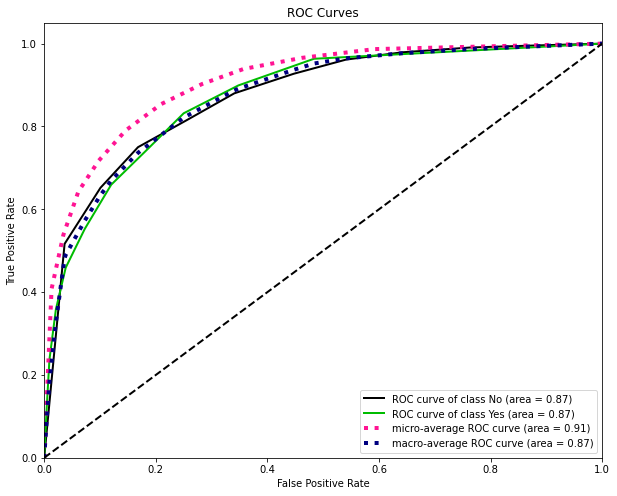

In [20]:
# Plotting ROC Curves
import scikitplot as skplt
y_probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))
plt.show()

In [21]:
# Finding AUC
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score

def aucScore(y_test, y_pred, average="weighted"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [22]:
# Area Under Curve
aucScore(y_test, y_pred)

0.7399721771388825

## Part V: Data Summary and Implications

> The accuracy score of this analysis is 0.8248. This means that there is an 82.48% chance of predicting correctly whether a customer will churn or not based on the variables we inputted, being Age, Tenure, Bandwidth Usage, and Monthly Charge.

> The Area Under Curve (AUC) is 0.7399721771388825 or about 74% of a correct prediction for the same problem. 

> The results show that there is tpically around a 75-85% of a correct prediction based on different models. The accuracy score and recall score are both 84%. The precision and f1 score are both about 82%. The AUC is quite significantly lower at 74%. The implications of this are that this algorithm is quite effective at predicting churn based on the inputted variables, however it is not near 100%. This algorithm could be used to get a general basis of information, but would then also need human verification for the results, as the accuracy score is not high enough to trust the results 100%, however it can provide a solid basis.

> One limitation of this data analysis is only running one type of model on the dataset, which can cause inacurate results. The dataset is also 10,000 rows, which is a lot, but not nearly enough to encompass all of the people that could be affected by an analysis like this. There could be so many more people and data that just were not included in this data set that could change the results.

> A real world scenario a company could take from this information is running the algoritm and getting a general basis of information of who might be the most likely to churn. They could then review that data and pinpoint the specific individuals who are at the highest likelihood of churn and could offer deals or some other incentive to get them to stay longer.